<a href="https://colab.research.google.com/github/MuneneMutuma/Stock-Prediction-Regression/blob/main/Regression_Stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Regression

### Importing Modules

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:
!wget https://raw.githubusercontent.com/MuneneMutuma/stock-prediction/main/NSE_data_all_stocks_2022_jan_to_may.csv

--2023-12-22 09:58:46--  https://raw.githubusercontent.com/MuneneMutuma/stock-prediction/main/NSE_data_all_stocks_2022_jan_to_may.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 552108 (539K) [text/plain]
Saving to: ‘NSE_data_all_stocks_2022_jan_to_may.csv.1’

NSE_data_all_stocks 100%[===================>] 539.17K  --.-KB/s    in 0.02s   

2023-12-22 09:58:47 (22.3 MB/s) - ‘NSE_data_all_stocks_2022_jan_to_may.csv.1’ saved [552108/552108]



## Load Data

In [ ]:
df = pd.read_csv('./NSE_data_all_stocks_2022_jan_to_may.csv')

## Feature Selection

In [ ]:
selected_companies = ['SCBK']

df2 = df[['Date', 'Code', 'Name', '12m Low', '12m High', 'Day Low', 'Day High', 'Day Price', 'Previous', 'Change']]
df2 = df2[df2['Code'].isin(selected_companies)]
df2 = df2.drop(['Code', 'Name'], axis=1)

## Pre Processing

### date conversion

In [ ]:
df2['Date'] = pd.to_datetime(df2['Date'], format='%d-%b-%y')
df2.set_index('Date', inplace=True)

### Check for null values

In [ ]:
df2.isnull().sum()

12m Low      0
12m High     0
Day Low      0
Day High     0
Day Price    0
Previous     0
Change       0
dtype: int64

### Viewing data

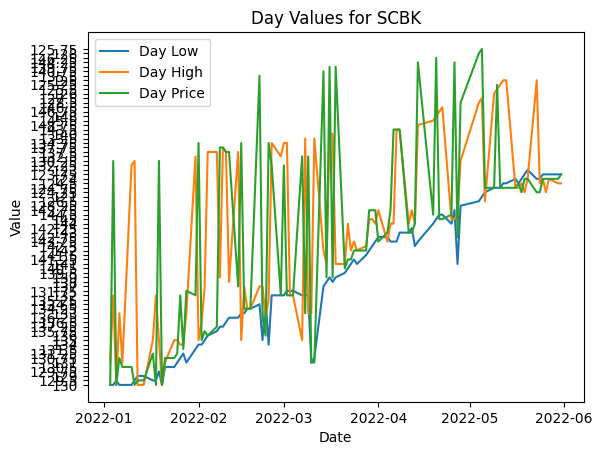

In [ ]:
columns = ['Day Low', 'Day High', 'Day Price']
for col in columns:
    plt.plot(df2[col], label=col)
plt.title('Day Values for SCBK')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [ ]:
features = ['12m High', '12m Low', 'Day Low', 'Day High']
target_variable = 'Day Price'

## Model Training

### Test Train Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df2[features], df2[target_variable], shuffle=False)


### Scaling

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler.fit_transform(y_test.values.reshape(-1, 1))

In [ ]:
# prompt: print the min and max of X_train_scaled and X_test_scaled and  y train scaled and y test scaled

print('X_train_scaled Min: ', X_train_scaled.min(), 'Max: ', X_train_scaled.max())
print('X_test_scaled Min: ', X_test_scaled.min(), 'Max: ', X_test_scaled.max())
print('y_train_scaled Min: ', y_train_scaled.min(), 'Max: ', y_train_scaled.max())
print('y_test_scaled Min: ', y_test_scaled.min(), 'Max: ', y_test_scaled.max())


X_train_scaled Min:  -2.3094010767585105 Max:  2.2896643678136934
X_test_scaled Min:  -2.8887406028850595 Max:  1.890662953187518
y_train_scaled Min:  -1.2880605647648207 Max:  1.9734035803283991
y_test_scaled Min:  -0.6189787688575493 Max:  2.116907389492811


### Linear Regression

In [ ]:
linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [ ]:
linreg_pred = linreg.predict(X_test_scaled)
linreg_mse = mean_squared_error(y_test_scaled, linreg_pred)
linreg_mse

2.9944941764965307

In [ ]:
linreg_r2 = r2_score(y_test_scaled, linreg_pred)
linreg_r2

-1.9944941764965298

In [ ]:
compare_df = pd.DataFrame({'Actual': y_test_scaled.reshape(-1,), 'Linear': linreg_pred.reshape(-1,)})
compare_df.sort_index(inplace=True)
compare_df.head(10)

,Actual,Linear
0,2.116907,1.795040
1,2.116907,1.873862
2,2.052534,1.641099
3,2.020347,1.600303
4,1.827225,1.220033
5,-0.007428,-1.449694
6,-0.071802,-1.896772
7,-0.361484,-2.835626
8,-0.490231,-2.346621
9,-0.490231,-2.285700


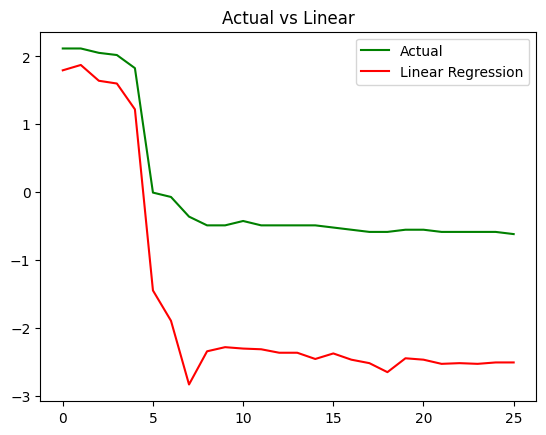

In [ ]:
plt.plot(compare_df['Actual'], color='green')
plt.plot(compare_df['Linear'], color='red')
plt.yscale('linear')
plt.title('Actual vs Linear')
plt.legend(['Actual', 'Linear Regression', 'Logistic Regression'])
plt.show()

In [ ]:
# Check the ranges of your features and target variable
print("Feature Ranges:")
for col in features:
    print(f"{col}: {df2[col].min()} - {df2[col].max()}")

print(f"Target Variable Range: {df2[target_variable].min()} - {df2[target_variable].max()}")

# Check model coefficients
coefficients = pd.DataFrame({'Feature': features, 'Coefficient': linreg.coef_.reshape(-1,)})
print(coefficients)

Feature Ranges:
12m High: 148.75 - 148.75
12m Low: 121 - 123
Day Low: 121 - 145
Day High: 124 - 148.75
Target Variable Range: 123.75 - 146.25
    Feature  Coefficient
0  12m High     0.000000
1   12m Low     0.032510
2   Day Low     0.815755
3  Day High     0.207231
